# 무신사 데이터 분석 및 머신러닝 프로젝트

### 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
  
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터 읽기

In [6]:
df_train = pd.read_csv("musinsa_final.csv")
#df_train = df_train.sort_values("TOTAL_SELL", ascending=False)
#title컬럼을 기준으로 중복 값 제거
df_train = df_train.drop_duplicates(['TITLE'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,NaN,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,NaN,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,NaN,여,532.0,42.0,NaN,28.0,1.0,100.0,2.0,77000.0,NaN,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,2019F/W/,남,287.0,13.0,NaN,10.0,NaN,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,2019F/W/,남,1188.0,108.0,NaN,53.0,14.0,100.0,3.0,89000.0,NaN,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,2019F/W/,남,1389.0,176.0,26.0,119.0,16.0,95.0,2.0,72000.0,NaN,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [7]:
df_train.describe()

,index,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE
count,43311.000000,43310.000000,42362.000000,7676.000000,37462.000000,15600.000000,43310.000000,42917.000000,4.331000e+04,23612.000000
mean,26115.588349,1399.053198,150.671569,477.658155,110.562036,370.021026,90.371277,1.962206,1.283339e+05,33.723827
std,14261.416959,10468.865875,1060.262019,2354.779404,703.722698,2247.306914,13.323649,0.747174,1.841422e+05,15.502748
min,0.000000,6.000000,0.000000,10.000000,1.000000,0.000000,20.000000,0.000000,5.000000e+03,3.000000
25%,13954.500000,49.000000,3.000000,15.000000,3.000000,2.000000,80.000000,2.000000,4.550000e+04,20.000000
50%,26526.000000,95.000000,10.000000,29.000000,10.000000,6.000000,95.000000,2.000000,7.200000e+04,30.000000
75%,38433.500000,295.000000,37.000000,96.000000,32.000000,27.000000,100.000000,2.000000,1.399000e+05,43.000000
max,50126.000000,812749.000000,44356.000000,71638.000000,25964.000000,43588.000000,100.000000,14.000000,5.391000e+06,90.000000


In [8]:
#널 값의 비율을 알아본다
df_train.isnull().sum()/len(df_train)

index            0.000000
TITLE            0.000023
BRAND            0.000023
SEASON           0.398259
SEX              0.000023
POPULARITY       0.000023
BUCKET           0.021911
TOTAL_SELL       0.822770
LIKE_            0.135047
REVIEW           0.639814
SATISFACTION     0.000023
DELIVERY_DATE    0.009097
PRICE            0.000023
SALE             0.454827
CATEGORY_        0.000023
IMG_URL          0.000023
dtype: float64

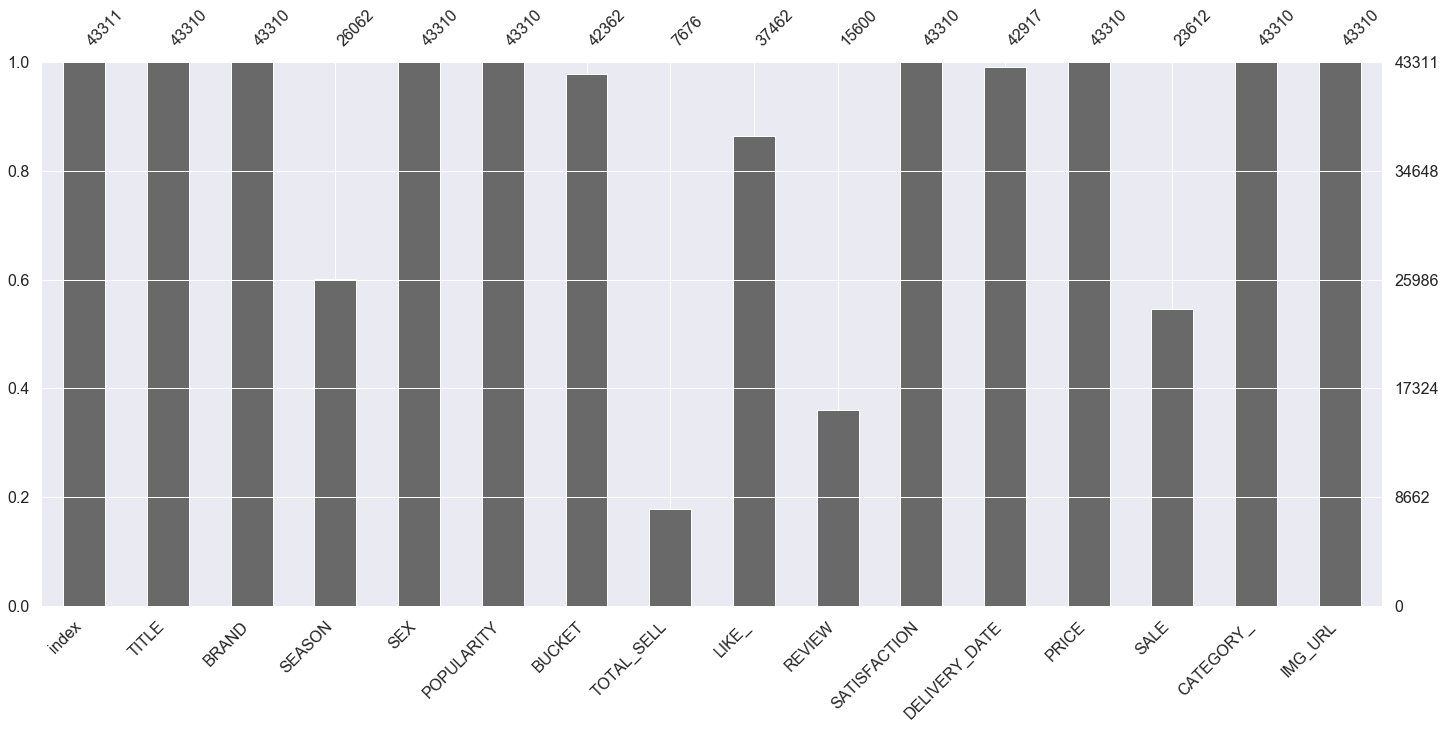

In [9]:
import missingno as msno
msno.bar(df=df_train)

In [10]:
#SALE의 null값은 할인률이 없는, 즉 할인하지 않는다는 의미이므로 0%로 바꿔준다
df_train['SALE'] = np.where(df_train['SALE'].isnull() ,0 , df_train['SALE'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,NaN,여,532.0,42.0,NaN,28.0,1.0,100.0,2.0,77000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,2019F/W/,남,287.0,13.0,NaN,10.0,NaN,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,2019F/W/,남,1188.0,108.0,NaN,53.0,14.0,100.0,3.0,89000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,2019F/W/,남,1389.0,176.0,26.0,119.0,16.0,95.0,2.0,72000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [11]:
#LIKE의 null값은 좋아요를 1개도 받지 못했다는 의미이므로 0개로 바꿔준다
df_train['LIKE_'] = np.where(df_train['LIKE_'].isnull() ,0 , df_train['LIKE_'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,NaN,여,532.0,42.0,NaN,28.0,1.0,100.0,2.0,77000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,2019F/W/,남,287.0,13.0,NaN,10.0,NaN,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,2019F/W/,남,1188.0,108.0,NaN,53.0,14.0,100.0,3.0,89000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,2019F/W/,남,1389.0,176.0,26.0,119.0,16.0,95.0,2.0,72000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [12]:
# season, review 항목은 사용하지 않기로 한다.
df_train = df_train.drop(['SEASON' , 'REVIEW'] , axis=1)
df_train

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50122,50122,MD CHERRY COKE MTM(IVORY)|MD CHERRY COKE MTM(I...,LUV IS TRUE,여,532.0,42.0,NaN,28.0,100.0,2.0,77000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50123,50123,패널 스웨트셔츠 - Grey/Black|Panel Sweatshirt - Grey/...,D.PRIQUE,남,287.0,13.0,NaN,10.0,100.0,2.0,69300.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50124,50124,N193USW900 멀린 플리스 부클 후리스 빅로고 맨투맨 HAVANA KHAKI|...,NATIONALGEOGRAPHIC,남,1188.0,108.0,NaN,53.0,100.0,3.0,89000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50125,50125,TIEDYE CREWNECK IA [MINT]|TIEDYE CREWNECK IA [...,VIVASTUDIO,남,1389.0,176.0,26.0,119.0,95.0,2.0,72000.0,0.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


In [13]:
#null값이 총 row의 10%를 넘어버리면 분석에 방해를 준다
#y축인 TOTAL_SELL 값의 null 값이 40000이 되므로 삭제한다.
df_train = df_train.dropna()
df_train

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50107,50107,스마일 로고 스웨트셔츠 (브라운)|SMILE LOGO SWEATSHIRTS BROWN,COVE,여,461.0,50.0,12.0,35.0,80.0,4.0,30800.0,30.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50108,50108,GNAC POCKET SWEATSHIRT_OATMEAL|GNAC POCKET SWE...,ROMANTIC CROWN,여,1011.0,118.0,12.0,87.0,100.0,2.0,44000.0,20.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50114,50114,[NK] PROGRESSIVE SWEATSHIRTS (PURPLE) (19FW-K0...,NASTYKICK,남,978.0,198.0,56.0,151.0,92.0,2.0,31200.0,40.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...
50117,50117,[기모][K.N.I.T]밀리터리 아플리케 스웨트 셔츠 카키|[기모][K.N.I.T]...,BEYOND CLOSET,남,364.0,99.0,12.0,64.0,90.0,2.0,60000.0,20.0,맨투맨/스웨트셔츠,https://image.msscdn.net/images/goods_img/2019...


# 타겟값 분류

> 랭킹 페이지에서 10페이지 이하에 들어갈수록 상품의 판매량이 좋아질 것으로 예상한다. 따라서, 중복 값 제거 후의 인덱스 값(랭킹 순위)에 따라 800 이하일 경우를 1로, 이상일 경우를 0으로 놓는다.

In [14]:
# 상위 페이지를 나타내는 칼럼 'first_page' 생성, 0과 1로 나누어진다.
df_train['FIRST_PAGE'] = 0
df_train.head()

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...,0
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...,0
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...,0
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...,0
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,0


In [15]:
# 1 페이지는 80개의 상품을 가지고 있기 때문에 상위 800개만 10페이지에 들어가게 된다.
df_train['FIRST_PAGE'][0:800] = 1
df_train.head()

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...,1
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...,1
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...,1
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...,1
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,1


In [16]:
# first_page에 저장된 값들의 빈도수
df_train['FIRST_PAGE'].value_counts()

0    6864
1     800
Name: FIRST_PAGE, dtype: int64

In [17]:
#
total_sell_means = pd.DataFrame(data=[df_train['TOTAL_SELL'][0:1000].mean(),df_train['TOTAL_SELL'][1001:2000].mean(),df_train['TOTAL_SELL'][2001:3000].mean(),df_train['TOTAL_SELL'][3001:4000].mean(),df_train['TOTAL_SELL'][4001:5000].mean(),df_train['TOTAL_SELL'][5001:6000].mean(),df_train['TOTAL_SELL'][6001:7000].mean(),df_train['TOTAL_SELL'][7001:].mean()], index=range(0,8), columns=['means'])
display(pd.DataFrame(total_sell_means))

,means
0,2299.076000
1,834.423423
2,391.557558
3,42.561562
4,24.656657
5,31.031031
6,26.956957
7,23.449472


# 상관관계 분석

### 5. 만족도와 랭킹 사이의 관계

In [18]:
# Satisfaction 컬럼의 빈도수 조회
df_train['SATISFACTION'].value_counts()

100.0    1250
93.0      824
90.0      634
95.0      615
94.0      504
92.0      494
80.0      477
96.0      424
91.0      370
87.0      273
97.0      271
88.0      245
98.0      233
89.0      207
85.0      158
84.0      107
86.0       86
60.0       81
83.0       74
70.0       54
73.0       44
99.0       40
82.0       35
75.0       22
76.0       21
78.0       18
77.0       17
67.0       13
72.0       10
40.0        9
74.0        8
81.0        7
20.0        6
65.0        6
68.0        5
79.0        4
64.0        3
53.0        3
50.0        3
71.0        2
47.0        2
66.0        2
69.0        2
56.0        1
Name: SATISFACTION, dtype: int64

In [27]:
df_train[df_train['FIRST_PAGE'] == 1]['SATISFACTION'].value_counts()

94.0     127
95.0     117
93.0     105
92.0      79
96.0      69
91.0      61
90.0      43
97.0      40
100.0     35
98.0      23
89.0      23
88.0      19
80.0      16
85.0       9
99.0       7
87.0       7
86.0       5
83.0       3
82.0       3
60.0       2
84.0       2
81.0       2
73.0       1
72.0       1
78.0       1
Name: SATISFACTION, dtype: int64

In [28]:
df_train[df_train['FIRST_PAGE'] == 0]['SATISFACTION'].value_counts()

100.0    1215
93.0      719
90.0      591
95.0      498
80.0      461
92.0      415
94.0      377
96.0      355
91.0      309
87.0      266
97.0      231
88.0      226
98.0      210
89.0      184
85.0      149
84.0      105
86.0       81
60.0       79
83.0       71
70.0       54
73.0       43
99.0       33
82.0       32
75.0       22
76.0       21
77.0       17
78.0       17
67.0       13
40.0        9
72.0        9
74.0        8
65.0        6
20.0        6
68.0        5
81.0        5
79.0        4
50.0        3
64.0        3
53.0        3
69.0        2
71.0        2
47.0        2
66.0        2
56.0        1
Name: SATISFACTION, dtype: int64

In [30]:
# satisfaction 컬럼에서 랭킹 지수 first_page=1인 줄 대입
high_ranking = df_train['SATISFACTION'][df_train['FIRST_PAGE'] == 1]
high_ranking

0       94.0
1       95.0
2       94.0
3       96.0
4       95.0
        ... 
1352    91.0
1353    78.0
1354    95.0
1355    93.0
1357    94.0
Name: SATISFACTION, Length: 800, dtype: float64

In [31]:
# satisfaction 컬럼에서 랭킹 지수 first_page=0인 줄 대입
low_ranking = df_train['SATISFACTION'][df_train['FIRST_PAGE'] == 0]
low_ranking

1358      93.0
1359      94.0
1360      92.0
1361      90.0
1364      88.0
         ...  
50107     80.0
50108    100.0
50114     92.0
50117     90.0
50125     95.0
Name: SATISFACTION, Length: 6864, dtype: float64

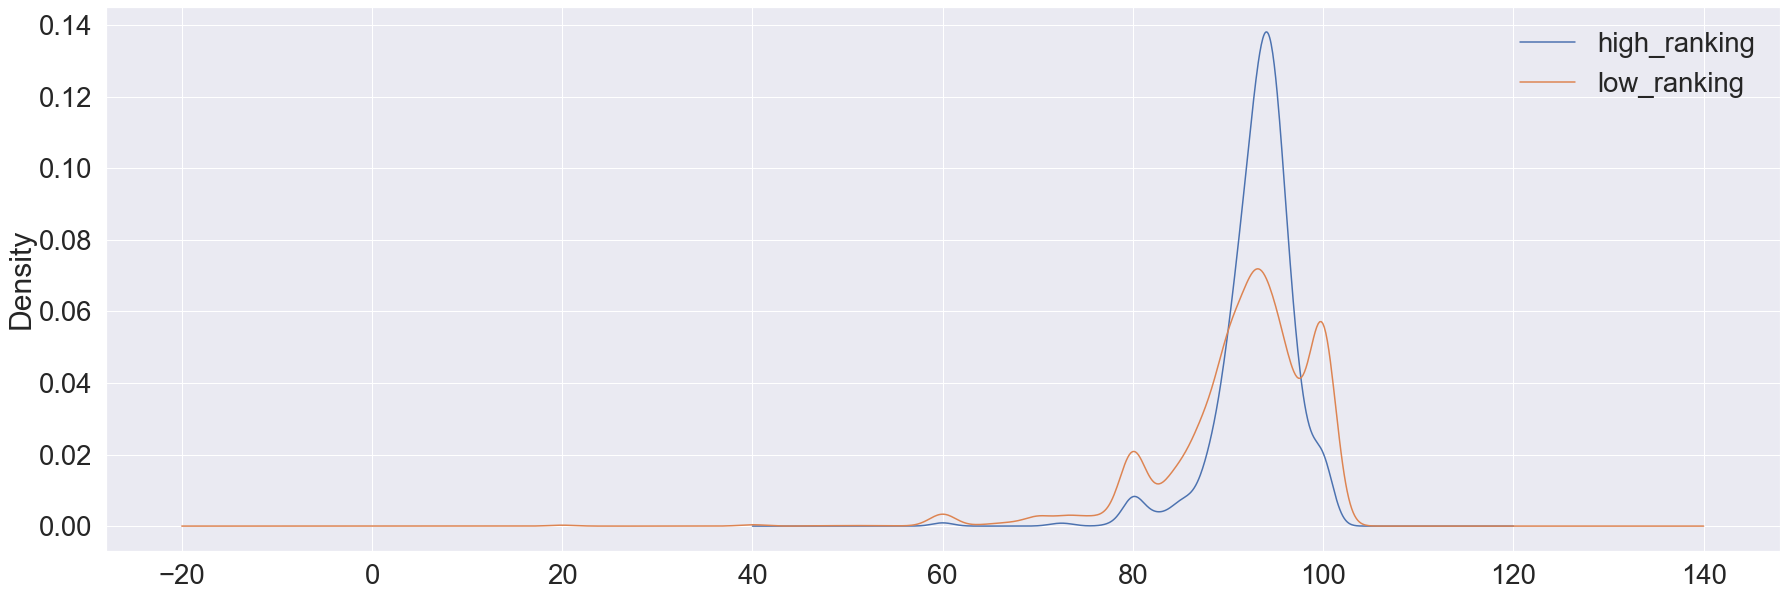

In [35]:
# satisfaction 컬럼에서 각 만족도 별 high_ranking과  low_ranking 비율을 그래프로 그려보자
plt.figure(figsize=(30,10))
high_ranking.plot(kind='kde')
low_ranking.plot(kind='kde')
plt.legend(['high_ranking', 'low_ranking'])

- 높낮이를 보면, 낮은 랭킹에 비해 높은 랭킹에서 만족도가 특정 범위에 뚜렷하게 집중되어 있는 것을 볼 수 있다. 
- 또, 그래프 모양을 봤을 때 low_ranking보다 high_ranking의 축이 더 오른쪽에 치우쳐져 있는 것을 볼 수 있다. 이는 랭킹이 높은 상품의 만족도가 낮은 랭킹의 상품들보다 높다는 것을 보여준다.

### 6. 배송 소요 시간과 랭킹 사이의 관계

In [38]:
# 각 배송일 별 상품의 수 조회
df_train['DELIVERY_DATE'].value_counts()

2.0     5808
1.0     1054
3.0      621
4.0      133
5.0       20
7.0       12
6.0        7
12.0       6
9.0        2
8.0        1
Name: DELIVERY_DATE, dtype: int64

In [66]:
# 높은 랭킹의 상품들 중 배송일이 빠른 순서로 데이터프레임화 시킨다. 
df_temp = df_train[df_train['FIRST_PAGE'] == 1]['DELIVERY_DATE'].value_counts()
df_delivery_high = pd.DataFrame({'delivery_date':df_temp.index, 'frequency':df_temp.values})
df_delivery_high.sort_values('delivery_date', ascending=True)

,delivery_date,frequency
2,1.0,32
0,2.0,662
1,3.0,68
3,4.0,30
4,7.0,3
6,9.0,2
5,12.0,3


In [67]:
# 낮은 랭킹의 상품들 중 배송일이 빠른 순서로 데이터프레임화 시킨다. 
df_temp = df_train[df_train['FIRST_PAGE'] == 0]['DELIVERY_DATE'].value_counts()
df_delivery_low = pd.DataFrame({'delivery_date':df_temp.index, 'frequency':df_temp.values})
df_delivery_low.sort_values('delivery_date', ascending=True)

,delivery_date,frequency
1,1.0,1022
0,2.0,5146
2,3.0,553
3,4.0,103
4,5.0,20
6,6.0,7
5,7.0,9
8,8.0,1
7,12.0,3


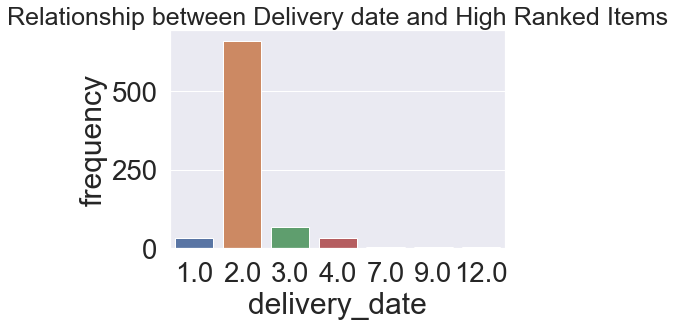

In [75]:
# 배송일 별 높은 랭킹의 상품들 분포도
sns.barplot(x='delivery_date', y='frequency', data=df_delivery_high, dodge=False)
plt.title('Relationship between Delivery date and High Ranked Items', fontsize='25')
plt.show()

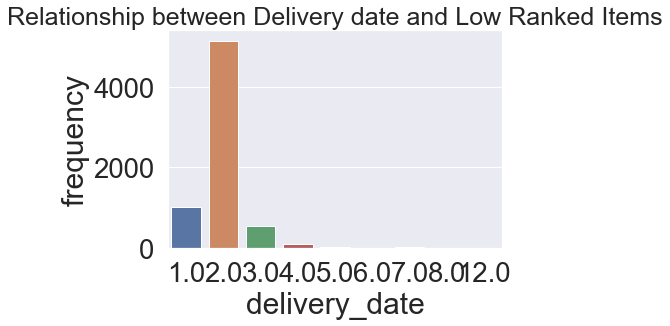

In [76]:
# 배송일 별 낮은 랭킹의 상품 분포도
sns.barplot(x='delivery_date', y='frequency', data=df_delivery_low, dodge=False)
plt.title('Relationship between Delivery date and Low Ranked Items', fontsize='25')
plt.show()

- 두 그래프를 비교해보면, 랭킹의 높고 낮음에 상관없이 배송일이 2일일 경우에 가장 많은 상품들이 군집되어 있고, 1일 혹은 3일이 소요되는 상품들이 큰 격차를 두고 분포함을 알 수 있다. 
- 이는 배송일이 랭킹의 높고 낮음에 큰 영향을 미치지 않음을 의미하므로, 해당 데이터는 x값에서 제외시키도록 한다.

### 7. 가격과 랭킹 사이의 관계

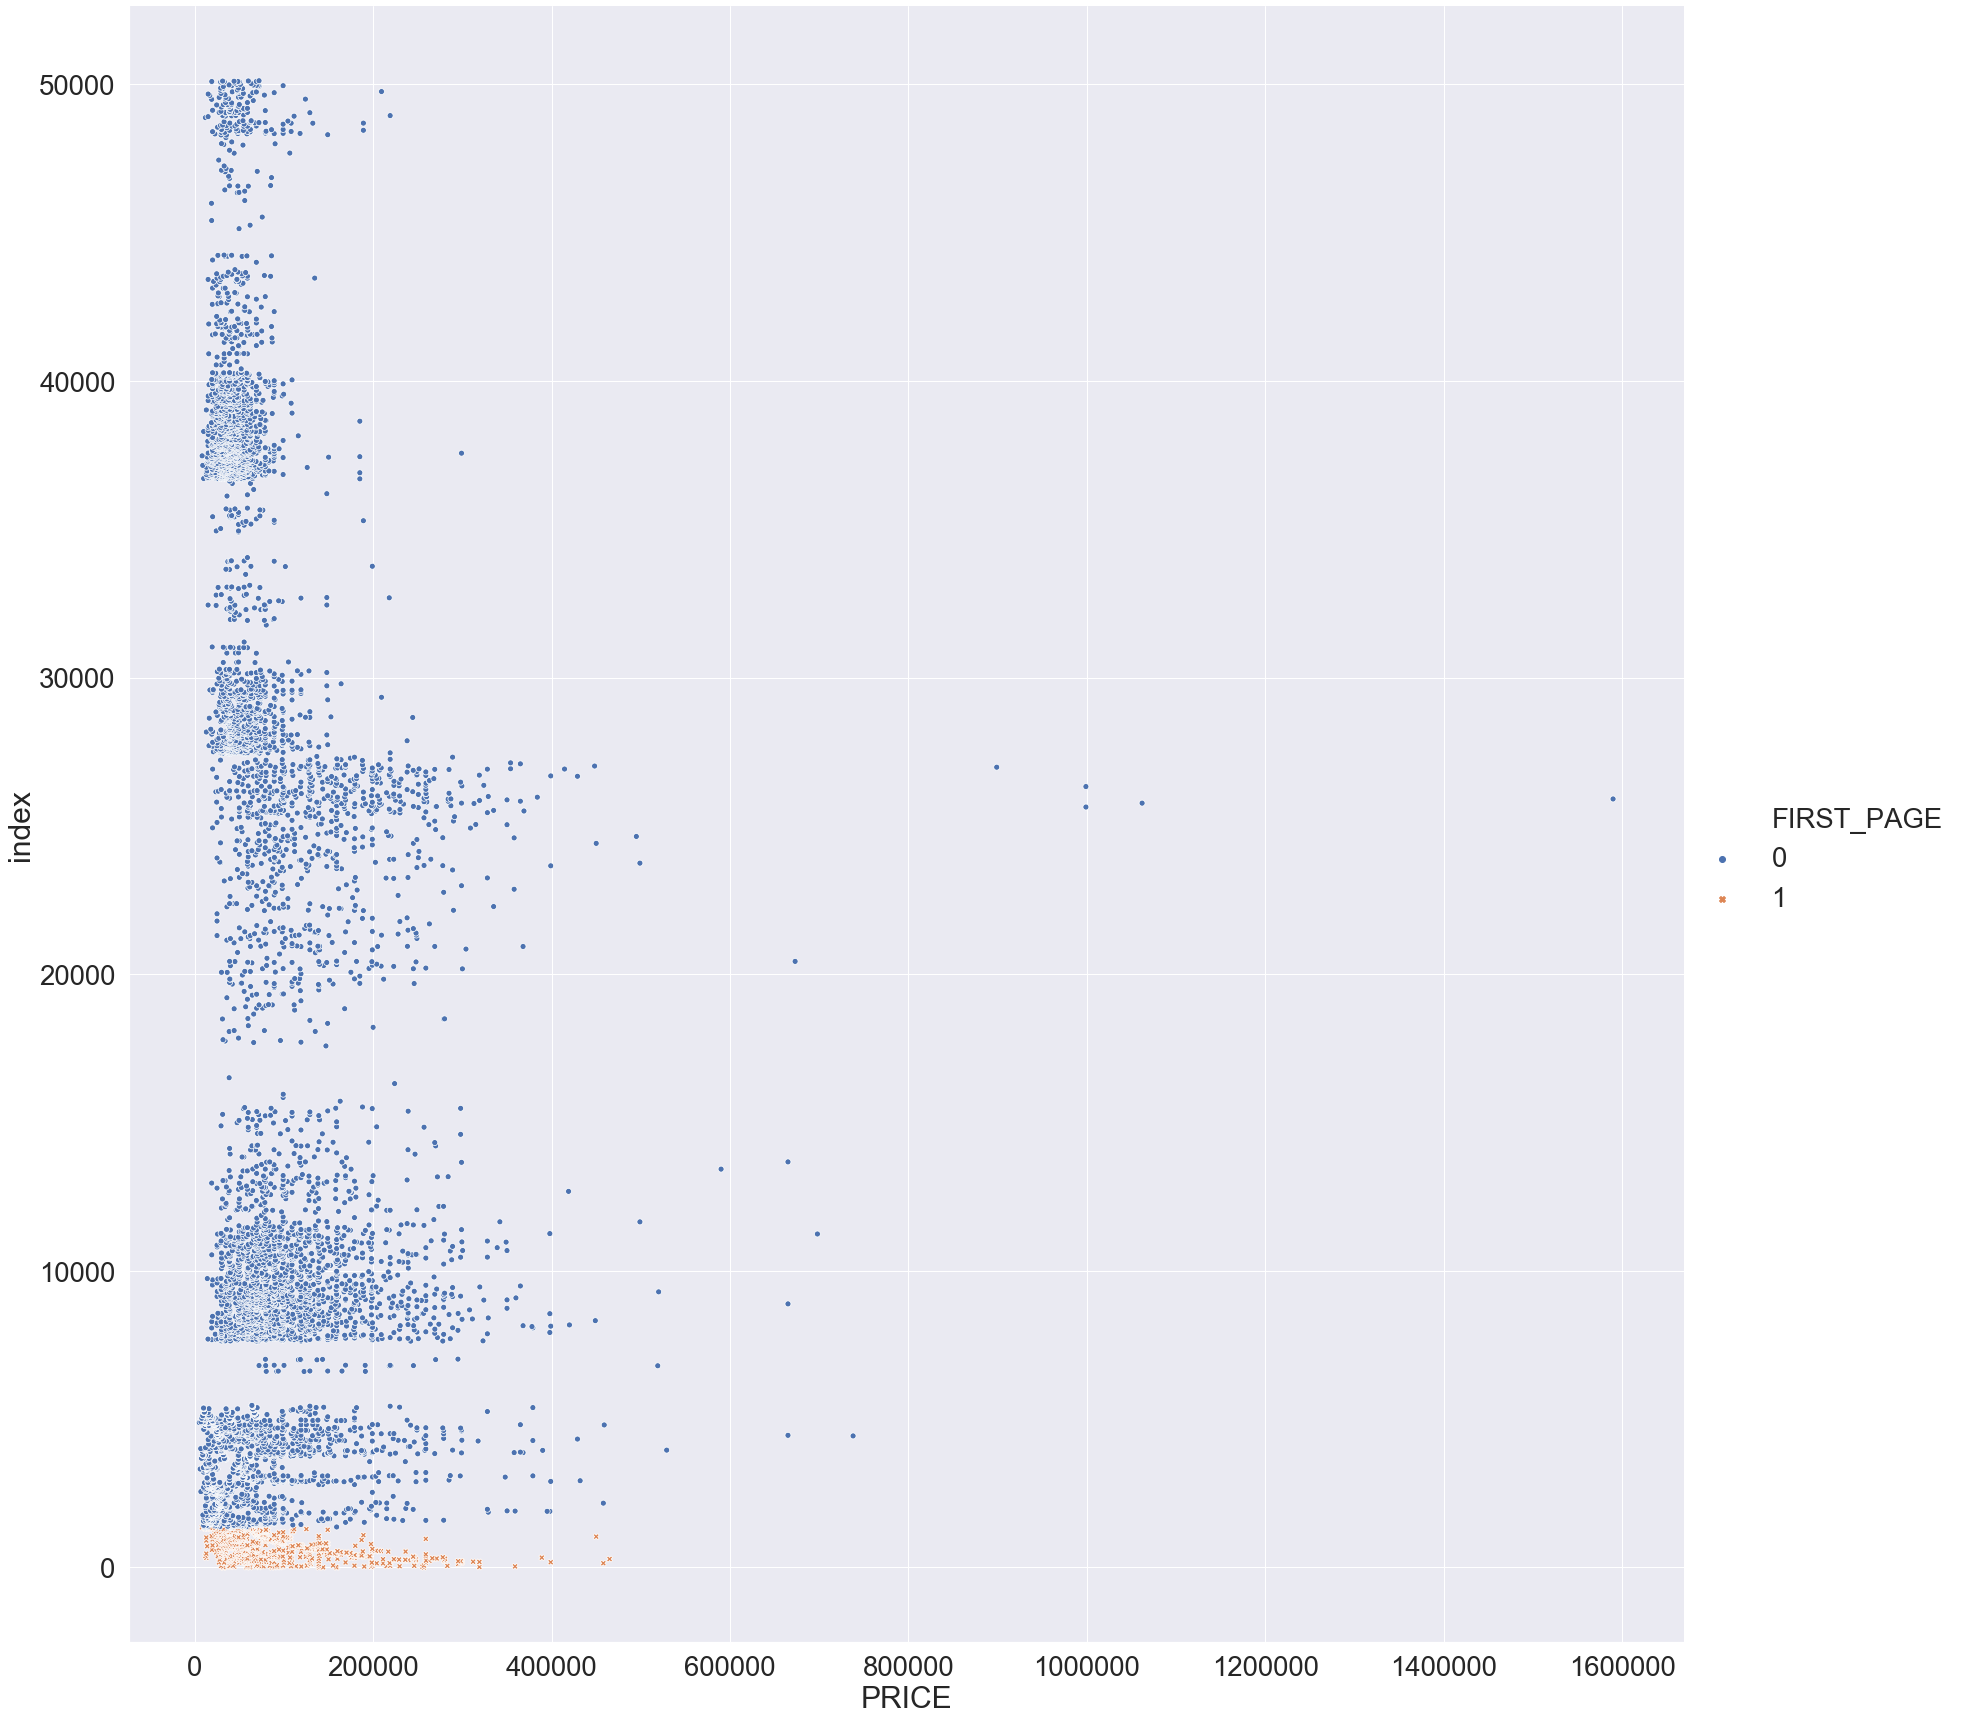

In [99]:
sns.relplot(x="PRICE", y="index", hue="FIRST_PAGE", style="FIRST_PAGE", data=df_train, height=24, aspect=1)

### 8. 할인률과 랭킹 사이의 관계